In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split 
from sklearn.cluster import KMeans

In [2]:
# 와인의 화학 조성을 사용하여 와인의 종류를 예측하기 위한 데이터
wine = load_wine()

In [3]:
wine

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [4]:
wine.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [5]:
df = pd.DataFrame(wine.data, columns = wine.feature_names)

In [6]:
types = pd.Series(wine.target, dtype="category")
types = types.cat.rename_categories(wine.target_names)
df['types'] = types
df['class'] = wine.target

In [7]:
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,types,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,class_0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,class_0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,class_0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,class_0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,class_0,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 15 columns):
alcohol                         178 non-null float64
malic_acid                      178 non-null float64
ash                             178 non-null float64
alcalinity_of_ash               178 non-null float64
magnesium                       178 non-null float64
total_phenols                   178 non-null float64
flavanoids                      178 non-null float64
nonflavanoid_phenols            178 non-null float64
proanthocyanins                 178 non-null float64
color_intensity                 178 non-null float64
hue                             178 non-null float64
od280/od315_of_diluted_wines    178 non-null float64
proline                         178 non-null float64
types                           178 non-null category
class                           178 non-null int64
dtypes: category(1), float64(13), int64(1)
memory usage: 19.9 KB


In [9]:
df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
# 그래프에서 한글을 사용하기 위해 한글폰트를 적용
# 맥북이기에 애플고딕을 사용
plt.style.use('seaborn') # seaborn 스타일로 변환
plt.rc('font', family='AppleGothic')
plt.rc('axes', unicode_minus=False)

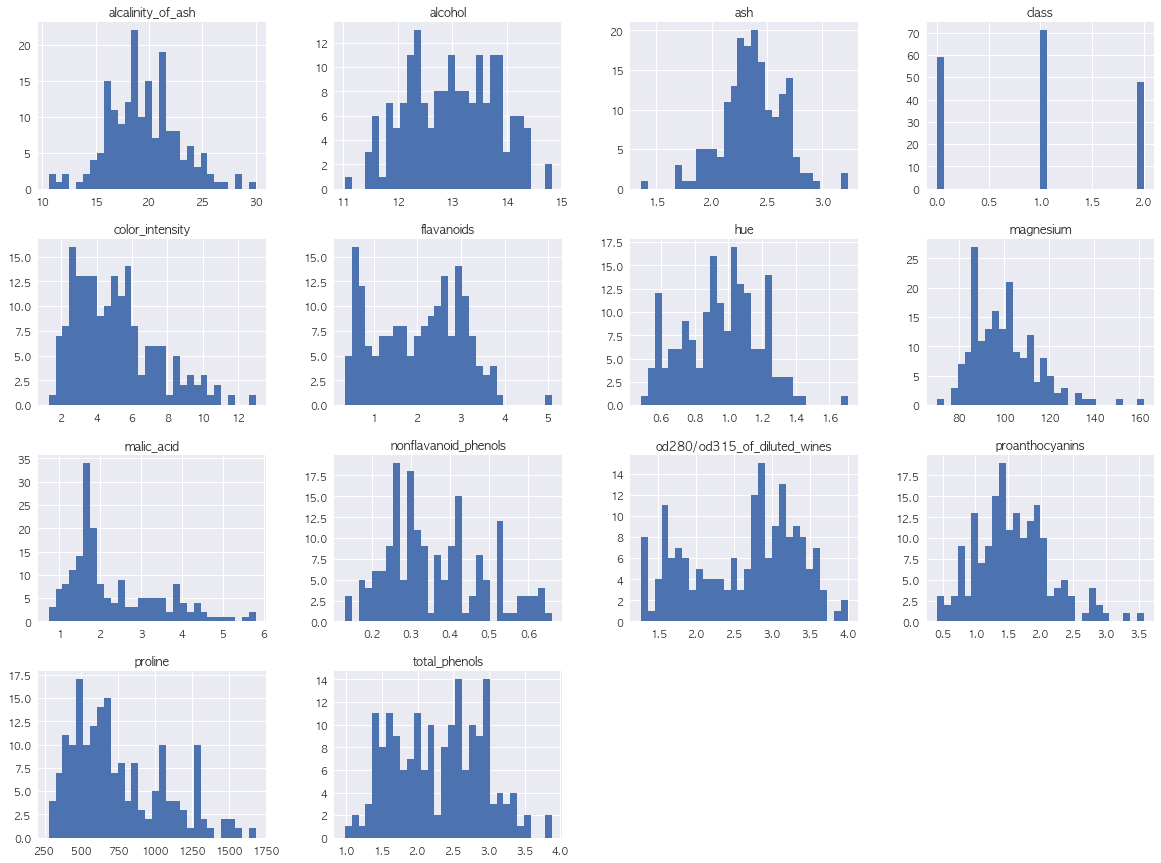

In [12]:
# 모든 연속형 변수에 대한 히스토그램
df.hist(bins=30,figsize=(20,15))
plt.show()

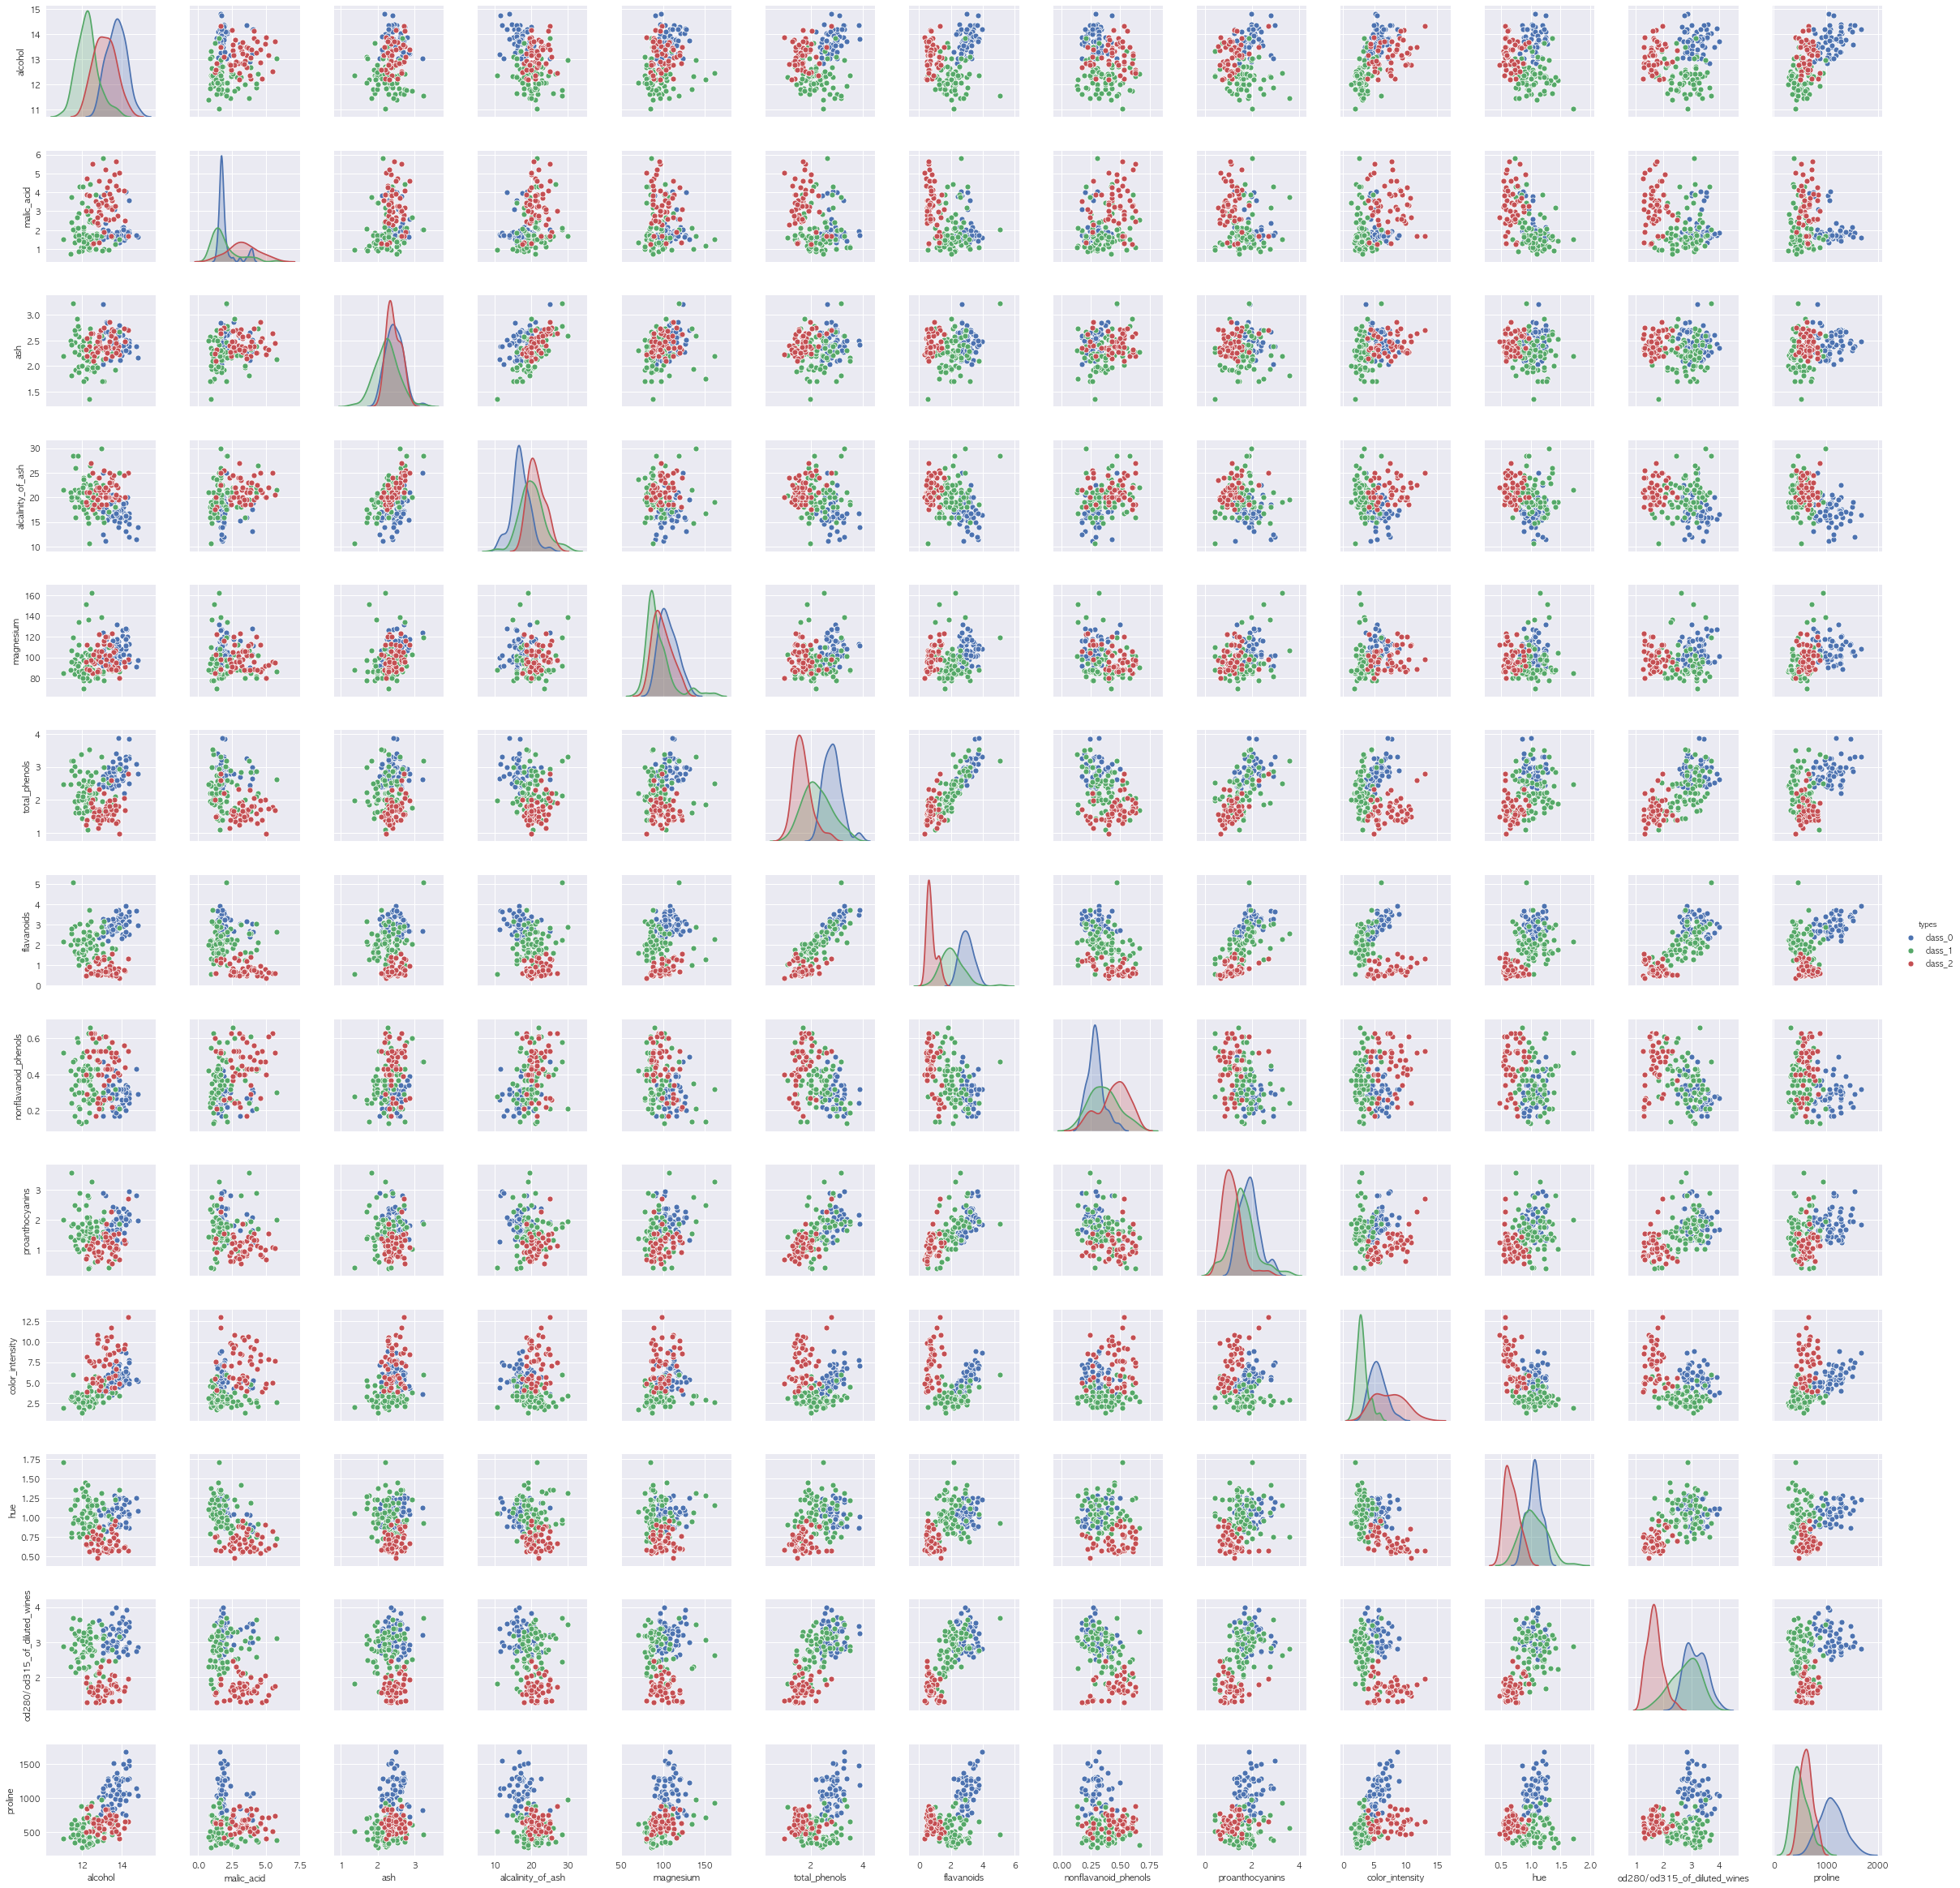

In [13]:
# column 들에 대한 pairplot
sns.pairplot( df[df.columns[:14]], hue="types")
plt.show()

## KMeans

In [14]:
X = df[df.columns[:13]]
y = df['class']

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
scale = StandardScaler() # 스케일링 모델 생성
X_scale = scale.fit_transform(X) # 스케일링

In [33]:
# centroid 개수(군집 개수에 따른 시작점을 의미) 를 2~9 를 설정
# 분류 정확도가 가장 높을 때는 군집의 개수가 3 일 때
scores = []
ks = range(2,9) # Ks 를 2~9 까지
for k in ks:
    kmean = KMeans(n_clusters = k)
    kmean.fit(X_scale)
    y_pred = kmean.labels_
    score = ((sum(y_pred == y)) / len(y))*100 # 실제 label 값과 예측 label 값 비교를 통해 실제값과 똑같이 분류되었을 때
    value = [k,score]
    scores.append(value)
    print(f"{k} 군집일 때, 분류 정확도는 {score}")

2 군집일 때, 분류 정확도는 42.69662921348314
3 군집일 때, 분류 정확도는 96.62921348314607
4 군집일 때, 분류 정확도는 29.775280898876407
5 군집일 때, 분류 정확도는 10.112359550561797
6 군집일 때, 분류 정확도는 50.56179775280899
7 군집일 때, 분류 정확도는 0.0
8 군집일 때, 분류 정확도는 16.292134831460675


### elbow point 찾기

In [34]:
# 거리계산 방법
# 각각 다른 방법으로 elbow point 를 구해봄
from scipy.spatial.distance import cdist, pdist

In [35]:
distortions_c = []
for k in ks:
    kmean = KMeans(n_clusters = k)
    kmean.fit(X_scale)
    distortions_c.append(sum(np.min(cdist(X_scale, kmean.cluster_centers_, 'euclidean'), axis=1)) / X_scale.shape[0])

In [36]:
distortions_p = []
for k in ks:
    kmean = KMeans(n_clusters = k)
    kmean.fit(X_scale)
    tot_withinss = sum((np.min(cdist(X_scale, kmean.cluster_centers_, 'euclidean'), axis=1))**2)
    totss = sum(pdist(X_scale)**2)/X_scale.shape[0]
    betweenss = totss - tot_withinss
    value = betweenss/totss*100
    distortions_p.append(value)

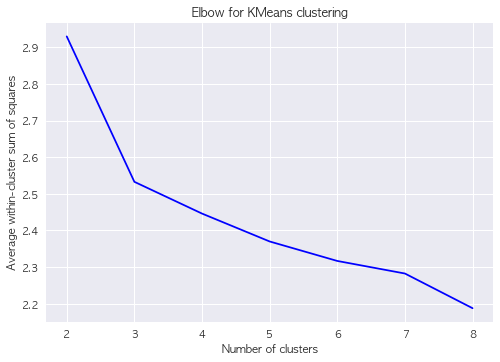

Text(0.5, 1.0, 'Elbow for KMeans clustering')

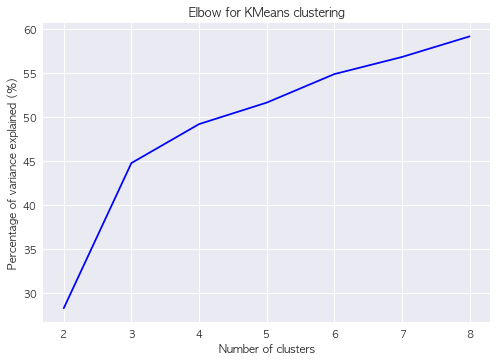

In [37]:
# Elbow point 구하기
# 두 그래프 모두 cluster 개수가 3인 지점에서 급격하게 경사가 기울움
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(ks, distortions_c, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Average within-cluster sum of squares')
plt.title('Elbow for KMeans clustering')
plt.show()


fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(ks, distortions_p, 'bx-')
# plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel('Percentage of variance explained (%)')
plt.title('Elbow for KMeans clustering')


In [45]:
from sklearn.cluster import DBSCAN
import mglearn

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [55]:
dbscan = DBSCAN() # 모델 생성
clusters = dbscan.fit_predict(X_scale) # 스케일된 데이터로 학습, 예측
print("클러스터 레이블:\n{}".format(clusters))

클러스터 레이블:
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


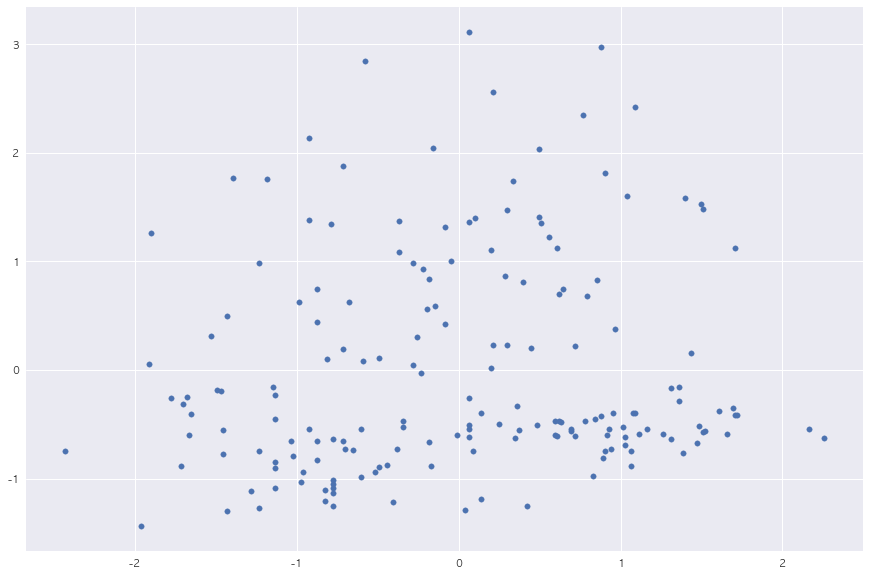

In [80]:
plt.figure(figsize = (15,10))
plt.scatter(X_scale[:,0], X_scale[:,1], marker = 'o', s=30)

In [82]:
# eps를 2로 했을 때에, 군집이 나뉘었음을 확인할 수 있음
dbscan_r = DBSCAN(min_samples = 2, eps = 2)
clusters_r = dbscan_r.fit_predict(X_scale)
print("클러스터 레이블:\n{}".format(clusters_r))

클러스터 레이블:
[ 0  0  0  0  0  0  0  0  0  0  0  0  0 -1 -1  0  0  0  0  0  0 -1  0  0
  0 -1  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  1  0  1  0 -1 -1  0
  0  0 -1  0  0  0  0  0  0  0  0 -1 -1 -1 -1  2 -1 -1 -1  0 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1  0  0  0 -1  3  0  0  0  0  0  0  0  0 -1 -1 -1
 -1  0  2 -1 -1  0  0  0  0 -1  0  0  0  3 -1  0 -1  0  0 -1  0  0 -1 -1
  0 -1 -1 -1 -1  0  0 -1  0 -1 -1  4  4  4  5  5 -1 -1  5  6  6 -1  6  5
 -1  4 -1  5  5  7  7  7 -1  5  5  5  5 -1  8  8  5  6  6  4  5  5  5  5
  5 -1  4  5  5  5  5  7  7 -1]


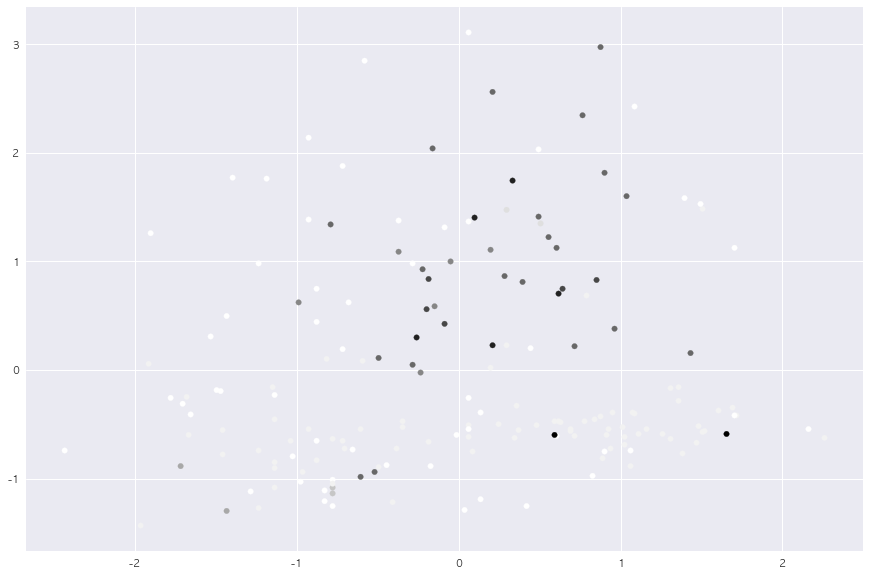

In [83]:
plt.figure(figsize = (15,10))
plt.scatter(X_scale[:,0], X_scale[:,1], marker = 'o', s=30, c = clusters_r)